# ***Задача IX.10.4 а)*** 
***Условие*** 

![alt text](1.png).

![alt text](2.png).

**1.** Мне посчастливилось угадать решение:

$$u(x, t) = \frac{1}{x + at + 1}$$

Найдем численное решение данной задачи. Схема:

$$\frac{u_{k}^{n + 1} - 2u_{k}^{n} + u_{k}^{n - 1}}{\Delta t^2} - \frac{u_{k + 1}^{n} - 2u_{k}^{n} + u_{k - 1}^{n}}{\Delta x^2} = f_k^n$$

Для сохранения 2-ого порядка (по обеим переменным) аппроксимации приблизим 1-ый слой по t таким способом:

$$u_k^1 = u_k^0 + \Delta t (u_k^0)' + \frac{\Delta t ^ 2}{2} (\frac{u_{k + 1}^{n} - 2u_{k}^{n} + u_{k - 1}^{n}}{\Delta x^2} + f_k^0)$$



In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from IPython.display import HTML
a = 0.5

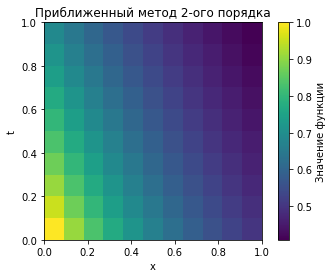

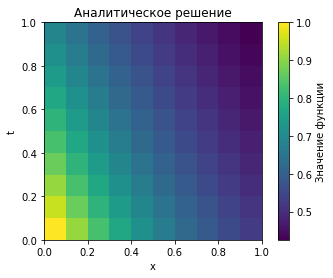

In [43]:
def right_edge_1(t):
    return 1 / (a * t + 2)

def left_edge_1(t):
    return 1 / (a * t + 1)

def start_u_1(x):
    return 1 / (x + 1)

def start_deriv_u_1(x):
    return -a / (x + 1)**2

def prec_ans(x, t):
    return 1 / (x + a * t + 1)

def right_part_1(x, t):
    return (2*a**2 - 2) / (x + a * t + 1)**3

def wave_eq_second_ord(right_edge, left_edge, start_u, start_deriv_u, right_part, h_t, h_x):
    n_t = int(T_t / h_t)
    n_x = int(T_x / h_x)
    h_t = T_t / n_t
    h_x = T_x / n_x
    kurr_numb = h_t**2 / h_x**2
    u_0 = [start_u(i * h_x) for i in range(n_x + 1)]
    u_deriv_0 = [start_deriv_u(i * h_x) for i in range(n_x + 1)]
    u_next = [u_0[i] + h_t * u_deriv_0[i] + (h_t**2 / 2) *
              (right_part(h_x * i, 0) + (u_0[i + 1] - 2 * u_0[i] + u_0[i - 1]) / h_x**2) for i in range(1, n_x)]
    u_next.insert(0, left_edge(h_t))
    u_next.append(right_edge(h_t))
    U = [np.copy(u_0), np.copy(u_next)]
    for i in range(2, n_t):
        u_next = 0
        u_next = [2 * U[i - 1][j] - U[i - 2][j] + kurr_numb * (U[i - 1][j + 1] - 2 * U[i - 1][j] + U[i - 1][j - 1])
                  + h_t**2 * right_part(j * h_x, (i - 1) * h_t) for j in range(1, n_x)]
        u_next.insert(0, left_edge(h_t * i))
        u_next.append(right_edge(h_t * i))
        U.append(np.copy(u_next))
    return U

T_t = 1
T_x = 1
h_t = 0.10
h_x = 0.10
n_t = int(T_t / h_t)
n_x = int(T_x / h_x)
lmbd = h_t / (2 * h_x**2)
u_0 = np.zeros(n_x - 1)

#TO FIX
U = wave_eq_second_ord(right_edge_1, left_edge_1, start_u_1, start_deriv_u_1, right_part_1, h_t, h_x)

plt.imshow(U, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Значение функции')  # Добавляем цветовую шкалу
plt.xlabel('x')
plt.ylabel('t')
plt.title('Приближенный метод 2-ого порядка')
plt.show()

U_real = []

for i in range(n_t):
    t = i * h_t
    U_real.append([])
    for j in range(n_x):
        x = j * h_x
        U_real[i].append(prec_ans(x, t))

plt.imshow(U_real, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Значение функции')  # Добавляем цветовую шкалу
plt.xlabel('x')
plt.ylabel('t')
plt.title('Аналитическое решение')
plt.show()


Выглядит отлично.

**2).** Ислледуем сходимости в разных нормах ($C^h$, $L_2^h$, $L_1^h$).

x_steps:  [0.13168724279835392, 0.0877914951989026, 0.05852766346593507, 0.03901844231062338, 0.02601229487374892, 0.017341529915832612, 0.011561019943888409, 0.0077073466292589396, 0.005138231086172626, 0.0034254873907817508]


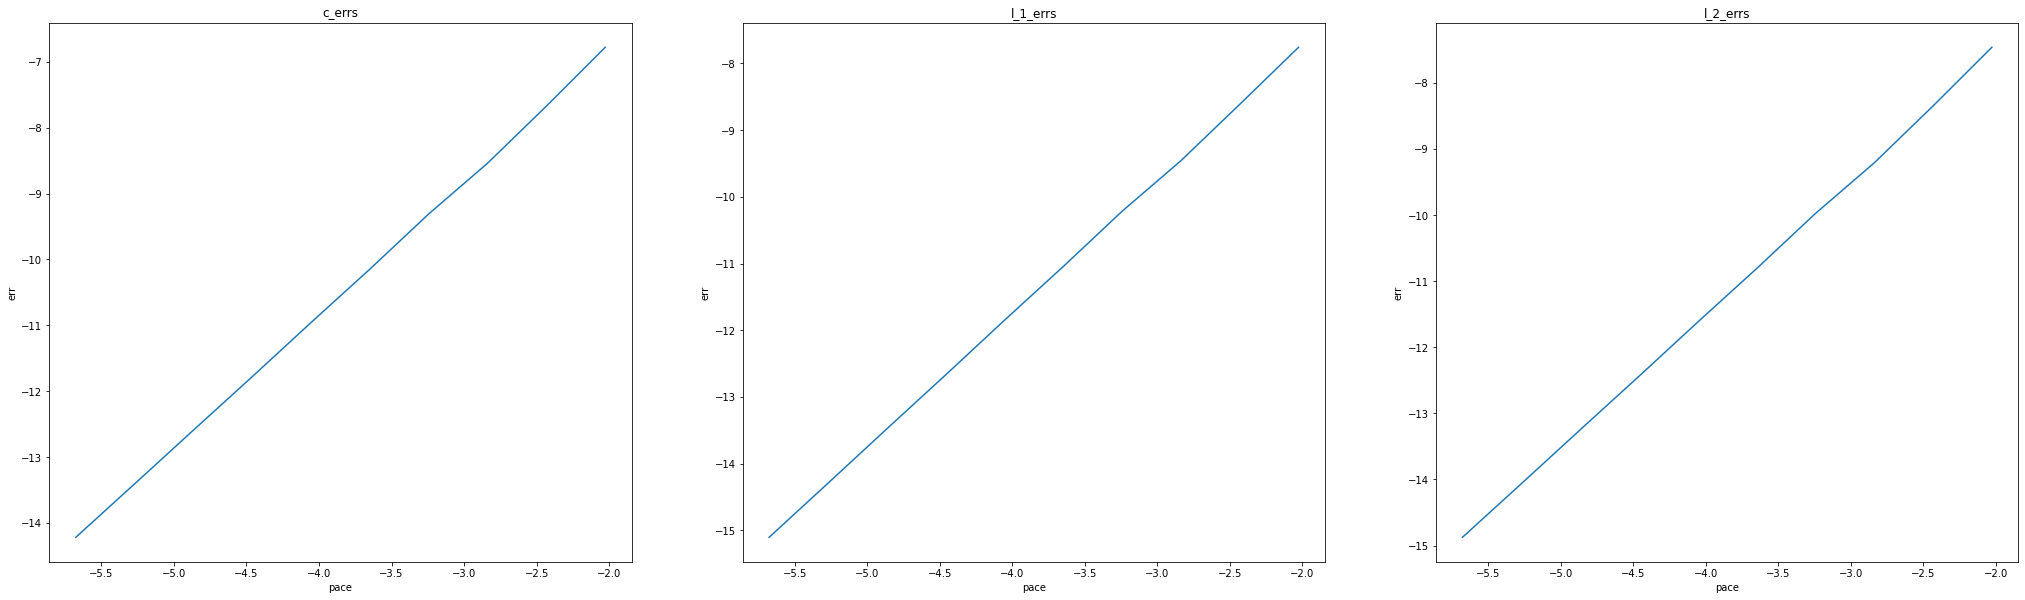

In [47]:
T_t = 1
T_x = 1
x_steps = [1.5**(-i) for i in range(5, 15)]
print("x_steps: ", x_steps)
errs = [[], [], []]
names_err = ['c_errs', 'l_1_errs', 'l_2_errs']

def c_err(x, y):
    er = np.max(np.array([np.max(abs(x[i] - y[i])) for i in range(len(x))]))
    return er

def l_2_err(x, y):
    sum = 0
    for i in range(len(x)):
        for j in range(len(x[0])):
            sum += (x[i][j] - y[i][j])**2
    sum *= h_t * h_x
    return math.sqrt(sum)

def l_1_err(x, y):
    sum = 0
    for i in range(len(x)):
        for j in range(len(x[0])):
            sum += abs(x[i][j] - y[i][j])
    sum *= h_t * h_x
    return sum

err_funcs = [c_err, l_1_err, l_2_err]

for i in range(len(x_steps)):
    h_x = x_steps[i]
    n_x = int(T_x / h_x)
    h_x = T_x / n_x
    h_t = h_x
    n_t = int(T_t / h_t)
    U = wave_eq_second_ord(right_edge_1, left_edge_1, start_u_1, start_deriv_u_1, right_part_1, h_t, h_x)

    U_real = []

    for i in range(n_t):
        t = i * h_t
        U_real.append([])
        for j in range(n_x + 1):
            x = j * h_x
            U_real[i].append(prec_ans(x, t))
    for i in range(3):
        errs[i].append(err_funcs[i](U_real, U))


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))  # figsize=(ширина, высота)
plt.tight_layout(pad=8.0)
# Построение графиков
ln_h_steps = [math.log(x_steps[i]) for i in range(len(x_steps))]
ln_errs = []
for j in range(3):
    ln_errs.append([math.log(errs[j][i]) for i in range(len(errs[j]))])
    axs[j].plot(ln_h_steps, ln_errs[j])
    axs[j].set_title(names_err[j])
    axs[j].set_xlabel('pace')
    axs[j].set_ylabel("err")

Как и ожидалось, во всех нормах сходимость 2-ого порядка (я брал шаги по t и x равными).